## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Hannah Niehaus, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, niehaus@uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import datetime as dt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy

%matplotlib inline

# Melt pond fraction from Sentinel-2

## Dataset resources

The data of the operational seaice concentration product can be downloaded via the link given below.

**Authors** Niehaus, H. and Spreen, G.

**Year** 2022

**Institute** Institute of Environmental Physics, University of Bremen

**URL** https://doi.pangaea.de/10.1594/PANGAEA.950885?format=html#download

**Citeable Publication** H. Niehaus, G. Spreen, G. Birnbaum, L. Istomina, E. Jäkel, F. Linhardt, N. Neckel, N. Fuchs, M. Nicolaus, and T. Sperzel, “Sea Ice Melt Pond Fraction Derived From Sentinel-2 Data: Along the MOSAiC Drift and Arctic-Wide,” Geophys. Res. Lett. 50(5), e2022GL102102 (2023)

## Reading example dataset

An NetCDF-file providing the melt pond fraction product of an arbitrary day and location (Sentinel-2 scene) was downloaded and saved in the working directory of this notebook (in this case the files is called "20210719_T45XVK_s2_mpf.nc"). The file is opened using the netCDF4 module and the melt pond fraction values read into memory.

In [2]:
data = Dataset('./20210719_T45XVK_s2_mpf.nc')
#print(data.variables['thickness'])
mpf = data.variables['mpf'][:]*100
x = data.variables['x'][:]
y = data.variables['y'][:]
date = data.date
zone = data.zone
data.close()

## Plotting the dataset

Using the Cartopy module, the melt pond fraction can be plotted onto a map. Using Cartopy's coordinate reference system module, a utm projection is created based on the utm zone given in the netcdf file. Ocean and land masks read in from the built-in Natural Earth API.

The extent of the data array is set to match the extent of the data. On a panarcitc map the small patch of data would not be visible.

In [3]:
crs = ccrs.UTM(zone)
land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')
ocean110m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='None', facecolor='lightgray')

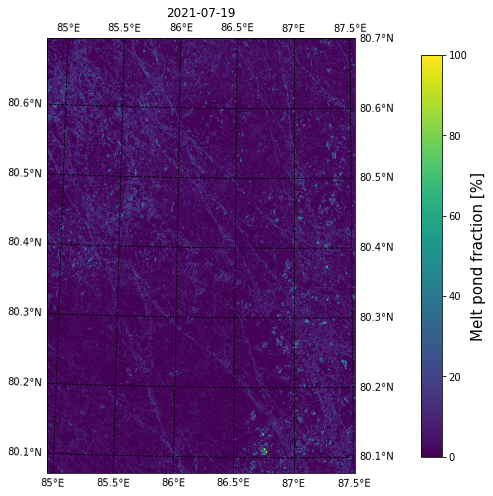

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection=crs)
ax.set_title(f'{date[:4]}-{date[4:6]}-{date[6:]}')
ax.add_feature(ocean110m)
ax.add_feature(land110m)
im = ax.imshow(mpf, extent=[np.nanmin(x),np.nanmax(x),np.nanmin(y),np.nanmax(y)], zorder=1)
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,linestyle = '--',color='black')
cb = fig.colorbar(im, ax=ax, fraction=0.024, pad=0.08)
cb.set_label('Melt pond fraction [%]', fontsize=15)